In [329]:
import numpy as np
import pandas as pd
import math
import time
import argparse
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
#from gensim.scripts.glove2word2vec import glove2word2vec
from tqdm import tqdm
import tensorflow_addons as tfa 
from keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from pytorch_pretrained_bert import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

In [337]:
X=np.random.random((10000, 2000))
y=np.random.random((10000))
Y=np.concatenate((np.array(1*(y<0.5)).reshape(1, len(y)), np.array(1*(y==0.5)).reshape(1, len(y)), np.array(1*(y>0.5)).reshape(1, len(y))), axis=0)
Y=np.transpose(Y)

callback = EarlyStopping(monitor='val_f1_score', patience=3)

trainX= X[:int(len(Y)*0.9), :]  #a[:1000, :]
trainY= Y[:int(len(Y)*0.9), :]         #Y[:1000]
testX= X[int(len(Y)*0.9):, :]   #a[1000:2000, :]
testY= Y[int(len(Y)*0.9):, :]  #Y[1000:2000]
np.save('testY', testY)
np.save('testX', testX)

look_back=1
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, X.shape[1])))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1])
history=model.fit(trainX, trainY, epochs=100, shuffle=True, batch_size=1024,  validation_split=0.1111, callbacks=[callback], verbose=1)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
8/8 [==============================] - 4s 176ms/step - loss: 1.0937 - accuracy: 0.3361 - f1_score: 0.2920 - val_loss: 0.9537 - val_accuracy: 0.5110 - val_f1_score: 0.2917
Epoch 2/100
8/8 [==============================] - 0s 25ms/step - loss: 0.9592 - accuracy: 0.4961 - f1_score: 0.2916 - val_loss: 0.9413 - val_accuracy: 0.5110 - val_f1_score: 0.2914
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.9484 - accuracy: 0.4992 - f1_score: 0.2913 - val_loss: 0.9352 - val_accuracy: 0.5110 - val_f1_score: 0.2911
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 0.9442 - accuracy: 0.4963 - f1_score: 0.2910 - val_loss: 0.9293 - val_accuracy: 0.5110 - val_f1_score: 0.2907
Epoch 5/100
8/8 [==============================] - 0s 22ms/step - loss: 0.9366 - accuracy: 0.4982 - f1_score: 0.2906 - val_loss: 0.9235 - val_accuracy: 0.5110 - val_f1_score: 0.2904
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 0.9331 - accuracy

Epoch 46/100
8/8 [==============================] - 0s 27ms/step - loss: 0.8005 - accuracy: 0.4952 - f1_score: 0.2793 - val_loss: 0.7967 - val_accuracy: 0.5110 - val_f1_score: 0.2792
Epoch 47/100
8/8 [==============================] - 0s 24ms/step - loss: 0.7988 - accuracy: 0.4943 - f1_score: 0.2791 - val_loss: 0.7950 - val_accuracy: 0.5110 - val_f1_score: 0.2789
Epoch 48/100
8/8 [==============================] - 0s 26ms/step - loss: 0.7961 - accuracy: 0.5011 - f1_score: 0.2789 - val_loss: 0.7934 - val_accuracy: 0.5110 - val_f1_score: 0.2787
Epoch 49/100
8/8 [==============================] - 0s 22ms/step - loss: 0.7957 - accuracy: 0.4925 - f1_score: 0.2786 - val_loss: 0.7918 - val_accuracy: 0.5110 - val_f1_score: 0.2785
Epoch 50/100
8/8 [==============================] - 0s 18ms/step - loss: 0.7938 - accuracy: 0.4936 - f1_score: 0.2784 - val_loss: 0.7902 - val_accuracy: 0.5110 - val_f1_score: 0.2782
Epoch 51/100
8/8 [==============================] - 0s 28ms/step - loss: 0.7921 - acc

Epoch 91/100
8/8 [==============================] - 0s 20ms/step - loss: 0.7490 - accuracy: 0.4951 - f1_score: 0.2704 - val_loss: 0.7475 - val_accuracy: 0.5110 - val_f1_score: 0.2703
Epoch 92/100
8/8 [==============================] - 0s 26ms/step - loss: 0.7482 - accuracy: 0.4971 - f1_score: 0.2703 - val_loss: 0.7468 - val_accuracy: 0.5110 - val_f1_score: 0.2702
Epoch 93/100
8/8 [==============================] - 0s 23ms/step - loss: 0.7480 - accuracy: 0.4891 - f1_score: 0.2701 - val_loss: 0.7462 - val_accuracy: 0.5110 - val_f1_score: 0.2700
Epoch 94/100
8/8 [==============================] - 0s 22ms/step - loss: 0.7469 - accuracy: 0.4954 - f1_score: 0.2699 - val_loss: 0.7455 - val_accuracy: 0.5110 - val_f1_score: 0.2698
Epoch 95/100
8/8 [==============================] - 0s 21ms/step - loss: 0.7463 - accuracy: 0.4949 - f1_score: 0.2698 - val_loss: 0.7449 - val_accuracy: 0.5110 - val_f1_score: 0.2697
Epoch 96/100
8/8 [==============================] - 0s 27ms/step - loss: 0.7450 - acc

In [ ]:
import numpy as np
X=np.load('X.npy')
idx_fail=np.load('idx_fail.npy')
X=np.delete(X, idx_fail, axis=0)
ki=np.load('ki_train.npy')
Y=1*(ki=='D')
Y=np.delete(Y, idx_fail)

names_span=['50000', '100000', '150000', '200000', '_f']

for name in names_span:
	if name=='50000':
		XX=np.load('X_ki'+name+'.npy')
		idx_fail=np.load('idx_fail_ki'+name+'.npy')
		XX=np.delete(XX, idx_fail, axis=0)
	else:
		XX_aux=np.load('X_ki'+name+'.npy')
		idx_fail=np.load('idx_fail_ki'+name+'.npy')
		XX_aux=np.delete(XX_aux, idx_fail, axis=0)
		XX=np.concatenate((XX, XX_aux))

AA=2*np.ones(XX.shape[0])
Y=np.concatenate((Y, AA))
perm=np.random.RandomState(seed=42).permutation(len(Y))
Y=Y[perm]
print(len(Y))
print(X.shape)
print(XX.shape)
X=np.concatenate((X, XX))
X=X[perm, :]
Y=Y.reshape(len(Y), 1)
Y=np.concatenate((1*(Y==0), 1*(Y==1), 1*(Y==2)), axis=1)

np.save('glove/X', X)
np.save('glove/Y', Y)

In [36]:
el=np.load('el.npy', allow_pickle=True)
ki=np.load('ki.npy', allow_pickle=True)
numalt=np.load('numalt.npy', allow_pickle=True)
nume=np.load('nume.npy', allow_pickle=True)
assert len(el)==len(ki)
assert len(nume)==len(numalt)
assert len(el)==len(nume)

In [42]:
import torch
import numpy as np
from pytorch_pretrained_bert import BertTokenizer
from transformers import BertModel
from tqdm import tqdm
import logging
import time
import transformers
#logging.basicConfig(level=logging.INFO)
#import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

el=np.load('el.npy', allow_pickle=True)
nume=np.load('nume.npy', allow_pickle=True)
ki=np.load('ki.npy', allow_pickle=True)


404 Client Error: Not Found for url: https://huggingface.co/bert//resolve/main/config.json


OSError: Can't load config for 'bert/'. Make sure that:

- 'bert/' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'bert/' is the correct path to a directory containing a config.json file



In [350]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [351]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [353]:
lis=[['killed', 'died', 'dead',  'death', 'decease', 'assassinated', 'dies', 'kill', 'deceased', 'victims'
], ['injury', 'injured', 'wound', 'wounded', 'hurt', 'damaged']]

In [354]:
from tqdm import tqdm
idx_together=[]
idx_numerals=[]
tokenized_text_vec=[]
indexed_tokens_vec=[]
mask_vec=[]
fail=0
segments_ids_vec = [] #[1] * len(tokenized_text[0])
max_len=0
for idx, txt in tqdm(enumerate(lis)):
    try:
        idx_numerals.append([txt.index('numnumnum'), len(txt)-txt.index('numnumnum')-1])
        new_idx_together=[]
        txt=str(txt)[1:-1].replace('\'', '')
        txt=txt.replace(',', '')
        txt=txt.replace('numnumnum', nume[idx])
        # Add the special tokens.
        marked_text = "[CLS] " + txt + " [SEP]"
        tokenized_text = tokenizer.tokenize(marked_text)
        max_len=max(len(tokenized_text), max_len)
        mask=np.concatenate((np.ones(len(tokenized_text)), np.zeros(int(100-len(tokenized_text)))))
        while len(tokenized_text)<100: tokenized_text.append("[PAD]")
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        segments_ids=[1]*len(tokenized_text)
        for idx, segment in enumerate(tokenized_text):
            if segment[:2]=='##': new_idx_together.append(idx)
        idx_together.append(new_idx_together)
        tokenized_text_vec.append(tokenized_text)
        indexed_tokens_vec.append(indexed_tokens)
        segments_ids_vec.append(segments_ids)     
        mask_vec.append(mask.tolist())
    except:
        fail+=1
tokens_tensor = torch.tensor([indexed_tokens_vec])
segments_tensors = torch.tensor([segments_ids_vec])
attention_mask = torch.tensor([mask_vec])
print(max_len)

2it [00:00, 215.45it/s]

0


In [383]:
idx_together=[]
idx_numerals=[]
tokenized_text_vec=[]
indexed_tokens_vec=[]
mask_vec=[]
fail=0
segments_ids_vec = [] #[1] * len(tokenized_text[0])
max_len=0
for idx, txt in tqdm(enumerate(lis)):
    print(txt)
    try:
        new_idx_together=[]
        txt=str(txt)[1:-1].replace('\'', '')
        txt=txt.replace(',', '')
        # Add the special tokens.
        marked_text = "[CLS] " + txt + " [SEP]"
        tokenized_text = tokenizer.tokenize(marked_text)
        max_len=max(len(tokenized_text), max_len)
        mask=np.concatenate((np.ones(len(tokenized_text)), np.zeros(int(100-len(tokenized_text)))))
        while len(tokenized_text)<100: tokenized_text.append("[PAD]")
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        segments_ids=[1]*len(tokenized_text)
        for idx, segment in enumerate(tokenized_text):
            if segment[:2]=='##': new_idx_together.append(idx)
        idx_together.append(new_idx_together)
        tokenized_text_vec.append(tokenized_text)
        indexed_tokens_vec.append(indexed_tokens)
        segments_ids_vec.append(segments_ids)     
        mask_vec.append(mask.tolist())
    except:
        fail+=1
tokens_tensor = torch.tensor([indexed_tokens_vec])
segments_tensors = torch.tensor([segments_ids_vec])
attention_mask = torch.tensor([mask_vec])
print(max_len)

2it [00:00, 254.35it/s]

['killed', 'died', 'dead', 'death', 'decease', 'assassinated', 'dies', 'kill', 'deceased', 'victims']
['injury', 'injured', 'wound', 'wounded', 'hurt', 'damaged']
13


In [384]:
attention_mask.shape

torch.Size([1, 2, 100])

In [385]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor[0], attention_mask[0], segments_tensors[0])

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [386]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings = token_embeddings.permute(1, 2, 0, 3)
token_embeddings.size()

torch.Size([2, 100, 13, 768])

In [387]:
idx_base=0
embeds=[]
for idx_4, sentence in enumerate(token_embeddings):
    token_vecs_sum = []
    mask=attention_mask[0][idx_4]
    idx_tog=idx_together[idx_4]
    primer=True 
    for idx_2, token in enumerate(sentence):
        new_idx=99-idx_2
        token=sentence[new_idx]
        if not primer and new_idx>0:
            new_cont+=1
            sum_vec += torch.sum(token[-4:], dim=0)
            if not new_idx in idx_tog:
                sum_vec=sum_vec/new_cont
                token_vecs_sum.append(sum_vec)
                sum_vec=torch.zeros(768)
                new_cont=0
            else:
                assert tokenized_text_vec[idx_4][new_idx][:2]=='##'
        if primer and mask[new_idx]==1:
            primer=False
            sum_vec=torch.zeros(768)
            new_cont=0
    token_vecs_sum=torch.stack(token_vecs_sum)
    embeds.append(token_vecs_sum)

In [393]:
embeds[0].shape

torch.Size([10, 768])

In [408]:
embeds[0].shape

torch.Size([10, 768])

In [410]:
vec=np.array((768, 1))
for el in embeds:
    print(el.shape)
    contador=0
    aux=np.zeros((768, 1))
    for word in el:
        aux+=np.array(word)
        contador+=1
    aux=aux/contador
    vec=np.concatenate((vec, aux))

    
        
    

torch.Size([10, 768])


ValueError: non-broadcastable output operand with shape (768,1) doesn't match the broadcast shape (768,768)

In [422]:
vec=np.zeros((768, 2))
vec[:, 0]=embeds[0].mean(axis=0)
vec[:, 1]=embeds[1].mean(axis=0)
vec=np.transpose(vec)

In [431]:
np.save('vec_bert', vec)

In [427]:
aa=embeds[1][0, 0]+embeds[1][1, 0]+embeds[1][2, 0]+embeds[1][3, 0]+embeds[1][4, 0]+embeds[1][5, 0]

In [ ]:
X=np.zeros((1, 768*12))
for idx, embed in enumerate(embeds):
    aux=np.zeros((1, 768*12))
    for idx_2, word in enumerate(embed):
        n=5-idx_2+idx_numerals[idx][1]
        aux[0, n*768:(n+1)*768]=word
    X=np.concatenate([X, aux], axis=0)
X=X[1:, :]

In [433]:
idx_base=0
embeds=[]
for idx, sentence in enumerate(token_embeddings):
    token_vecs_sum = []
    mask=attention_mask[0][idx_base+idx]
    idx_tog=idx_together[idx_base+idx]
    primer=True 
    for idx_2, token in enumerate(sentence):
        # `token` is a [12 xe 768] tensor
        new_idx=99-idx_2
        token=sentence[new_idx]
        if not primer and new_idx>0:
            new_cont+=1
            sum_vec += torch.sum(token[-4:], dim=0)
            if not new_idx in idx_tog:
                sum_vec=sum_vec/new_cont
                token_vecs_sum.append(sum_vec)
                sum_vec=torch.zeros(768)
                new_cont=0
        if primer and mask[new_idx]==1:
            primer=False
            sum_vec=torch.zeros(768)
            new_cont=0
    if idx_numerals[idx][0]==0:
        aux=token_vecs_sum[idx_numerals[idx][1]:]
        B = torch.stack(aux).mean(axis=0).reshape(len(token_vecs_sum)-idx_numerals[idx][1]-idx_numerals[idx][0], 768)
        if idx_numerals[idx][1]==0:
            token_vecs_sum=torch.cat([B], axis=-2)
        else:
            A = torch.stack(token_vecs_sum[:idx_numerals[idx][1]], dim=0).reshape(idx_numerals[idx][1], 768)
            token_vecs_sum=torch.cat([A, B], axis=-2)
    else: 
        aux=token_vecs_sum[idx_numerals[idx][1]:-idx_numerals[idx][0]]
        C = torch.stack(token_vecs_sum[-idx_numerals[idx][0]:], dim=0).reshape(idx_numerals[idx][0], 768)
        B = torch.stack(aux).mean(axis=0).reshape(len(token_vecs_sum)-idx_numerals[idx][1]-idx_numerals[idx][0], 768)
        if idx_numerals[idx][1]==0:
            token_vecs_sum=torch.cat([B, C], axis=-2)
        else:
            A = torch.stack(token_vecs_sum[:idx_numerals[idx][1]], dim=0).reshape(idx_numerals[idx][1], 768)
            token_vecs_sum=torch.cat([A, B, C], axis=-2)
    embeds.append(token_vecs_sum)
    print(len(token_vecs_sum)-idx_numerals[idx][1]-idx_numerals[idx][0])
    
X=np.zeros((1, 768*12))
for idx, embed in enumerate(embeds):
    aux=np.zeros((1, 768*12))
    for idx_2, word in enumerate(embed):
        n=5-idx_2+idx_numerals[idx][1]
        aux[0, n*768:(n+1)*768]=word
    X=np.concatenate([X, aux], axis=0)
X=X[1:, :]

1
1
1
1
1


In [420]:
X=np.zeros((1, 768*12))
for idx, embed in enumerate(embeds):
    aux=np.zeros((1, 768*12))
    for idx_2, word in enumerate(embed):
        n=5-idx_2+idx_numerals[idx][1]
        aux[0, n*768:(n+1)*768]=word
    X=np.concatenate([X, aux], axis=0)
X=X[1:, :]

# EVAL

In [485]:
import numpy as np
import pandas as pd
import math
import time
import argparse
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
#from gensim.scripts.glove2word2vec import glove2word2vec
from tqdm import tqdm
import tensorflow_addons as tfa 
from keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

In [504]:
def plot_metric(history, metric, name):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.savefig(name+metric)
    plt.close()

In [498]:
history.history['f1_score']

[0.2177366018295288,
 0.2207740992307663,
 0.2210048884153366,
 0.2211650162935257,
 0.2209213525056839,
 0.2210668921470642,
 0.22107140719890594,
 0.22102689743041992,
 0.2209825962781906,
 0.22102223336696625]

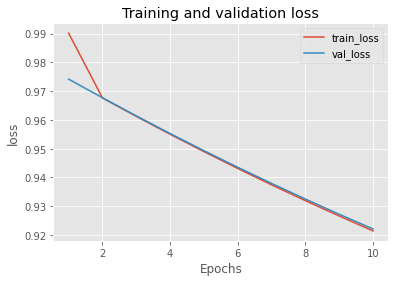

In [500]:
plot_metric(history, 'loss', 'figures/')

In [486]:
from tensorflow.compat.v1.keras.layers import LSTM

In [505]:
X=np.random.random((10000, 2000))
y=np.random.random((10000))
Y=np.concatenate((np.array(1*(y<0.5)).reshape(1, len(y)), np.array(1*(y==0.5)).reshape(1, len(y)), np.array(1*(y>0.5)).reshape(1, len(y))), axis=0)

In [506]:
Y=np.transpose(Y)
f1 = tfa.metrics.F1Score(3)
trainX= X[:int(len(Y)*0.9), :]  #a[:1000, :]
trainY= Y[:int(len(Y)*0.9), :]         #Y[:1000]
testX= X[int(len(Y)*0.9):, :]   #a[1000:2000, :]
testY= Y[int(len(Y)*0.9):, :]  #Y[1000:2000]
np.save('testY', testY)
np.save('testX', testX)

look_back=1
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(1, X.shape[1])))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1])
history=model.fit(trainX, trainY, epochs=10, shuffle=True, batch_size=1024,  validation_split=0.1111, verbose=1)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])


plot_metric(history, 'accuracy', 'figures/')
plot_metric(history, 'loss', 'figures/')
plot_metric(history, 'f1_score', 'figures/')

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

trainScore = f1(trainY, trainPredict).numpy()
print('F1: Train Score: %.2f I - %.2f K - %.2f Other' % (trainScore[0], trainScore[1], trainScore[2]))
testScore = f1(testY, testPredict).numpy()
print('F1: Test Score: %.2f I - %.2f K - %.2f Other' % (testScore[0], testScore[1], testScore[2]))

trainScore=metrics.categorical_accuracy(trainY, trainPredict)
print('Train Score: %.2f Categorical Accuracy' % (trainScore.numpy().mean()))
testScore=metrics.categorical_accuracy(testY, testPredict)
print('Test Score: %.2f Categorical Accuracy' % (testScore.numpy().mean()))



Epoch 1/10
8/8 [==============================] - 34s 203ms/step - loss: 1.0252 - accuracy: 0.4541 - f1_score: 0.2088 - val_loss: 0.9579 - val_accuracy: 0.5000 - val_f1_score: 0.2210
Epoch 2/10
8/8 [==============================] - 0s 40ms/step - loss: 0.9558 - accuracy: 0.5024 - f1_score: 0.2214 - val_loss: 0.9517 - val_accuracy: 0.5000 - val_f1_score: 0.2223
Epoch 3/10
8/8 [==============================] - 0s 42ms/step - loss: 0.9497 - accuracy: 0.5020 - f1_score: 0.2224 - val_loss: 0.9457 - val_accuracy: 0.5000 - val_f1_score: 0.2228
Epoch 4/10
8/8 [==============================] - 0s 36ms/step - loss: 0.9428 - accuracy: 0.5053 - f1_score: 0.2229 - val_loss: 0.9398 - val_accuracy: 0.5000 - val_f1_score: 0.2230
Epoch 5/10
8/8 [==============================] - 0s 32ms/step - loss: 0.9366 - accuracy: 0.5069 - f1_score: 0.2231 - val_loss: 0.9341 - val_accuracy: 0.5000 - val_f1_score: 0.2231
Epoch 6/10
8/8 [==============================] - 0s 35ms/step - loss: 0.9306 - accuracy: 0.5

In [ ]:
X=np.load('X.npy')
idx_fail=np.load('idx_fail.npy')
X=np.delete(X, idx_fail, axis=0)
ki=np.load('ki_train.npy')
Y=1*(ki=='D')
Y=np.delete(Y, idx_fail)

In [293]:
no_max=int(228200/100)+1
maxims_no=np.linspace(0, 0+(100*no_max),no_max,endpoint=False)[1:]
maxims_no

array([1.000e+02, 2.000e+02, 3.000e+02, ..., 2.280e+05, 2.281e+05,
       2.282e+05])

In [317]:
import numpy as np
from tqdm import tqdm

y=np.zeros((1,1))
X=np.zeros((1, 9216))
grups=[50000,100000, 150000, 200000, 250000, 300000] 
for idx, grup in tqdm(enumerate(grups)):
    X_ki_aux=np.load('bert/aux/X_ki_'+str(maxim)+'.npy')
    ki_aux=np.load('bert/aux/y_ki_'+str(maxim)+'.npy')
    X=np.concatenate((X, X_ki_aux))
    y=np.concatenate((y, ki_aux), axis=1)
    assert y.shape[1]==X.shape[0]
    assert X.shape[1]==768*12
    
X=X[1:, :]
y=y[:, 1:]            
            

grups=[50000,100000, 150000, 200000, 250000] 


for idx, grup in tqdm(enumerate(grups)):
    X_ki_aux=np.load('bert/aux2/X_no_'+str(maxim)+'.npy')
    ki_aux=2*np.ones((1, X_ki_aux.shape[0]))
    X=np.concatenate((X, X_ki_aux))
    y=np.concatenate((y, ki_aux.reshape(1, len(ki_aux))), axis=1)
    assert y.shape[1]==X.shape[0]
    assert X.shape[1]==768*12

perm=np.random.RandomState(seed=42).permutation(y.shape[1])
Y=y[:, perm]
X=X[perm, :]
Y=Y.reshape(Y.shape[1], 1)
Y=np.concatenate((1*(Y==0), 1*(Y==1), 1*(Y==2)), axis=1)
np.save('bert/X.npy', X)
np.save('bert/Y.npy', Y)




In [278]:
import numpy as np
from tqdm import tqdm


no_max=int(228200/100)+1
maxims_no=np.linspace(0, 0+(100*no_max),no_max,endpoint=False)[1:]
ki_max=int(251000/100)+1
maxims_ki=np.linspace(0, 0+(100*ki_max),ki_max,endpoint=False)[1:]


y=np.zeros((1,1))
X=np.zeros((1, 9216))
for idx, maxim in tqdm(enumerate(maxims_ki)):
    maxim=int(maxim)
    X_ki_aux=np.load('bert/ki/X_ki_'+str(maxim)+'.npy')
    ki_aux=np.load('bert/ki/ki_'+str(maxim)+'.npy')
    ki_aux=1*(ki_aux=='D')
    X=np.concatenate((X, X_ki_aux))
    y=np.concatenate((y, ki_aux.reshape(1, len(ki_aux))), axis=1)
    assert y.shape[1]==X.shape[0]
    assert X.shape[1]==768*12
X=X[1:, :]
y=y[:, 1:]

np.save('bert/X_mid.npy', X)
np.save('bert/y_mid.npy', y)

for idx, maxim in tqdm(enumerate(maxims_no)):
    maxim=int(maxim)
    X_no_aux=np.load('bert/no/X_no_'+str(maxim)+'.npy')
    no_aux=2*np.ones((1, X_no_aux.shape[0]))
    X=np.concatenate((X, X_no_aux))
    y=np.concatenate((y, no_aux), axis=1)
    assert y.shape[1]==X.shape[0]
    assert X.shape[1]==768*12


perm=np.random.RandomState(seed=42).permutation(y.shape[1])
Y=y[:, perm]
X=X[perm, :]
Y=Y.reshape(Y.shape[1], 1)
Y=np.concatenate((1*(Y==0), 1*(Y==1), 1*(Y==2)), axis=1)
np.save('bert/X.npy', X)
np.save('bert/Y.npy', Y)


In [ ]:
names_span=['50000', '100000', '150000', '200000', '_f']


for name in names_span:
	if name=='50000':
		XX=np.load('X_ki'+name+'.npy')
		idx_fail=np.load('idx_fail_ki'+name+'.npy')
		XX=np.delete(XX, idx_fail, axis=0)
	else:
		XX_aux=np.load('X_ki'+name+'.npy')
		idx_fail=np.load('idx_fail_ki'+name+'.npy')
		XX_aux=np.delete(XX_aux, idx_fail, axis=0)
		XX=np.concatenate((XX, XX_aux))

AA=2*np.ones(XX.shape[0])
Y=np.concatenate((Y, AA))
perm=np.random.RandomState(seed=42).permutation(len(Y))
Y=Y[perm]
print(len(Y))
print(X.shape)
print(XX.shape)
X=np.concatenate((X, XX))
X=X[perm, :]
Y=Y.reshape(len(Y), 1)
Y=np.concatenate((1*(Y==0), 1*(Y==1), 1*(Y==2)), axis=1)

print('Model')
print(params.model)

print('Directory')
print(params.dir)


print('Lets see the shapes')
print(X.shape)
print(Y.shape)

# Create A 

In [ ]:
import numpy as np
import pandas as pd
import math
import time
import argparse
from tqdm import tqdm
import scipy.linalg
from scipy.linalg import lstsq
import sklearn.metrics


tt=time.time()
Y=np.load('bert/Y.npy')
print(time.time()-tt)


tt=time.time()
X=np.load('bert/X_train.npy', mmap_mode='r')
print(time.time()-tt)


vec=np.load("bert/vec_vert.npy")
kill=vec[0, :].reshape((1, 768))
injured=vec[1, :].reshape((1, 768))

class_weight = {0: 9.1, 1: 2.78, 2: 1.92}

Y_train=np.zeros((Y.shape[0], 300))

for i in range(Y.shape[0]):
    if Y[i, 0]==1: aux_emb=injured #np.ones((1, 300))  #np.concatenate((np.ones((1, 100)), np.zeros((1, 100)), np.zeros((1, 100))), axis=1)    #5*(injured-kill) #np.concatenate((np.ones((1, 100)), np.zeros((1, 100)), np.zeros((1, 100))), axis=1) #kill-injured   #np.concatenate((np.ones((1, 100)), np.zeros((1, 100)), np.zeros((1, 100))), axis=1)   #np.ones((1, 300))
    if Y[i, 1]==1: aux_emb=kill #-np.ones((1, 300))  #np.concatenate((np.zeros((1, 100)), np.ones((1, 100)), np.zeros((1, 100))), axis=1)     #5*(kill-injured)  ##injured-kill #np.concatenate((np.zeros((1, 100)), np.ones((1, 100)), np.zeros((1, 100))), axis=1)   #-np.ones((1, 300))
    if Y[i, 2]==1: aux_emb=np.zeros((1, 768)) #np.zeros((1, 300))  #np.concatenate((np.zeros((1, 100)), np.zeros((1, 100)), np.ones((1, 100))), axis=1) #np.zeros((1, 300))  #np.concatenate((np.zeros((1, 100)), np.zeros((1, 100)), np.ones((1, 100))), axis=1) #np.zeros((1, 300))   #np.concatenate((np.zeros((1, 100)), np.zeros((1, 100)), np.ones((1, 100))), axis=1)
    Y_train[i, :]=aux_emb #+X[i, 300*5:300*6])/2
    #Y_train[i, :]=(np.sqrt(class_weight[Y[i]]))*Y_train[i, :] #/2
np.save("Y_train", Y_train)

'''
bad_idx=[]
for idx in range(len(Y)):
    contador=0
    aux=np.zeros((1, 300))
    for idx_2 in range(11):
        if (X[idx, idx_2*300:(idx_2+1)*300]**2).sum()!=0.0: ++contador
        aux=X[idx, idx_2*300:(idx_2+1)*300]+aux
    if contador==0:
        bad_idx.append(idx)
    else: X[idx, 1500:1800]=(np.sqrt(class_weight[Y[idx]]))*aux #/contador

X=X[:, 1500:1800]
'''

print("We are doing dead, injury,... AVERAGING!")

for size in [1000, 10000, 50000, 100000]:
    print("New size is "+ str(size))
    p, res, rnk, s = lstsq(X[:size], Y_train[:size])
    np.save("A/A_co"+str(size), p)
    print("Silhouette_score")
    print("Train")
    #print(sklearn.metrics.silhouette_score(X[:size, 1500:1800], Y[:size]))
    print(sklearn.metrics.silhouette_score(X[:size, :], Y[:size]))
    print("Val")
    #print(sklearn.metrics.silhouette_score(X[100000:, 1500:1800], Y[100000:]))
    print(sklearn.metrics.silhouette_score(X[100000:, :], Y[100000:]))
    print("New Silhouette_score")
    print("Train")
    print(sklearn.metrics.silhouette_score(np.matmul(X[:size], p), Y[:size]))
    print("Val")
    print(sklearn.metrics.silhouette_score(np.matmul(X[100000:], p), Y[100000:]))
    print(np.matmul(X[100000:], p).shape)
    print("__________________")

In [ ]:
y=np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    if Y[i, 0]==1: y[idx]=0
    if Y[i, 1]==1: y[idx]=1 
    if Y[i, 2]==1: y[idx]=2 

In [482]:
import statistics

def avg(lst):
    return sum(lst) / len(lst)


file_object  = open("aux.txt", "r")
a=file_object.readlines()
IT=[]
KT=[]
OT=[]

IV=[]
KV=[]
OV=[]

for line in a:
    if line[:8]=='F1: Test':
        IT.append(float(line[line.find(' I')-4:line.find(' I')-1]))
        KT.append(float(line[line.find(' K')-4:line.find(' K')-1]))
        OT.append(float(line[line.find(' Other')-4:line.find(' Other')-1]))
    else:
        IV.append(float(line[line.find(' I')-4:line.find(' I')-1]))
        KV.append(float(line[line.find(' K')-4:line.find(' K')-1]))
        OV.append(float(line[line.find(' Other')-4:line.find(' Other')-1]))

print("I mean: "+str(avg(IT)))
print("K mean: "+str(avg(KT)))   
print("O mean: "+str(avg(OT)))    
    
print('Train')
print('Mean F1 score:'+str((avg(IT)+avg(KT)+avg(OT))/3))
    
print('Val')
print("I mean: "+str(avg(IV)))
print("K mean: "+str(avg(KV)))   
print("O mean: "+str(avg(OV)))  
print("SD: "+str(((statistics.stdev(IV)+statistics.stdev(KV)+(statistics.stdev(OV)))/3)))

I mean: 0.6900000000000001
K mean: 0.7999999999999999
O mean: 0.7999999999999999
Train
Mean F1 score:0.7633333333333333
Val
I mean: 0.6888888888888889
K mean: 0.7999999999999999
O mean: 0.7999999999999999
SD: 0.011111111111111108


In [477]:
line[:8]

'F1: Test'

In [483]:
def avg(lst):
    return sum(lst) / len(lst)

file_object  = open("aux2.txt", "r")
a=file_object.readlines()
T=[]
V=[]
for line in a:
    if line[:5]=='Test ':
        T.append(float(line[line.find('.')-1:line.find('.')+3]))
    else:
        V.append(float(line[line.find('.')-1:line.find('.')+3]))
        
print("Train mean: "+str(avg(T)))       
print("Train Accuracy SD: "+str(statistics.stdev(T))) 

print("Val mean: "+str(avg(K)))  
print("Val Accuracy SD: "+str(statistics.stdev(V)))       

Train mean: 0.845
Train Accuracy SD: 0.010801234497346443
Val mean: 0.8000000000000003
Val Accuracy SD: 0.010801234497346443


In [484]:
line

'Test Score: 0.85 Categorical Accuracy\n'

# Histogram

In [30]:
import numpy as np
numalt=np.load('numalt.npy', allow_pickle=True)
nume=np.load('nume.npy', allow_pickle=True)
num_no=np.load('num_no_cont.npy', allow_pickle=True)
ki=np.load('ki.npy', allow_pickle=True)



#Dictionaries for reference
ones = {"1":"One","2":"Two","3":"Three","4":"Four","5":"Five","6":"Six", "7":"Seven","8":"Eight","9":"Nine"}
ones_B = {"01":"One","02":"Two","03":"Three","04":"Four","05":"Five","06":"Six", "07":"Seven","08":"Eight","09":"Nine"}
afterones = {"10":"Ten","11":"Eleven","12":"Twelve","13":"Thirteen","14":"Fourteen","15":"Fifteen","16":"Sixteen", "17":"Seventeen","18":"Eighteen","19":"Nineteen"}
tens = {"2":"Twenty","3":"Thirty","4":"Fourty","5":"Fifty","6":"Sixty", "7":"Seventy","8":"Eighty","9":"Ninety"}
grand={0:" Billion, ",1:" Million, ",2:" Thousand, ",3:""}

#Function converting number to words of 3 digit
def num_to_wrds(val, lead=False, sign=' '):
    val=str(val)
    ans = ""
    if lead:
        if len(val)>6 and val[-6:]=='000000':
            aux=val[:-6]
            return str(aux)+ ' million'
        elif len(val)>3 and val[-3:]=='000':
            aux=val[:-3]
            return str(aux)+ ' thousand'
    if len(val)>6:
        if val[:-6]!='000':
            aux=val[:-6]
            while len(aux)<3: aux='0'+aux
            ans=num_to_wrds(aux, sign=sign)+ ' million '
        val=val[-6:]
    if len(val)>3:
        if val[:-3]!='000':
            aux=val[:-3]
            while len(aux)<3: aux='0'+aux
            ans=ans+num_to_wrds(aux, sign=sign)+ ' thousand '
        val=val[3:]
    while len(val)<3: val='0'+val
    if val[0] in ones:
        x = val
        ans = ans + ones[val[0]] + " hundred "
        #if val[1:]!='00':
            #ans = ans + " and "
    if val[1:] in afterones:
        ans = ans + afterones[val[1:]] + " "
    elif val[1] in tens:
        ans = ans + tens[val[1]] 
        if val[2:3] in ones or val[1:3] in ones_B: ans=ans+sign
        if val[2:3] in ones:
            ans = ans + ones[val[2]]
    if val[1:3] in ones_B:
        ans = ans + ones[val[2]]
    if ans=='': return ans
    while ans[0]==' ': ans=ans[1:]
    while ans[-1]==' ': ans=ans[:-1]
    while ans!=ans.replace('  ', ' '):
        ans=ans.replace('  ', ' ')
    return str(ans.lower())

nums={}
for idx in range(1000):
    nums[num_to_wrds(idx+1, sign='-')]=idx+1

nums_no=[]   
for ele in num_no:
    if ele[-2:]=='.0': ele=ele[:-2]
    ele=str(ele).replace('\'', '')
    ele=ele.replace(',', '')
    ele=ele.replace('.', '')
    if ele in nums:
        nums_no.append(int(nums[ele]))
    else:
        nums_no.append(int(ele))
        
I=[] 
K=[]  
for idx, ele in enumerate(numalt):
    if ele[-2:]=='.0': ele=ele[:-2]
    ele=str(ele).replace('\'', '')
    ele=ele.replace(',', '')
    ele=ele.replace('.', '')
    if ki[idx]=='I':
        I.append(int(ele))
    else:
        K.append(int(ele))

In [32]:
len(K)+len(I)

251006

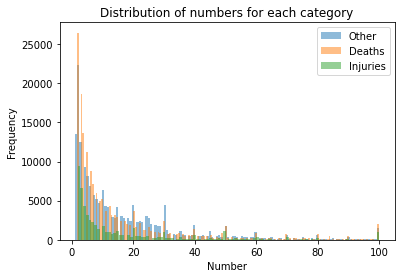

In [47]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=nums_no, bins='auto', alpha=0.5, histtype='stepfilled', range=[1, 100], label='Other')
plt.hist(x=K, bins='auto', alpha=0.5, histtype='stepfilled', range=[1, 100],  label='Deaths')
plt.hist(x=I, bins='auto', alpha=0.5, histtype='stepfilled', range=[1, 100],  label='Injuries')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Distribution of numbers for each category')
plt.legend(loc='upper right')
plt.savefig('hist_100')
plt.show()
                            #alpha=0.7, rwidth=0.85)


In [ ]:
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
n, bins, patches = 